In [1]:
import sys

sys.path.append("../")

In [2]:
import cheetah
import matplotlib.pyplot as plt
import numpy as np
from gymnasium.wrappers import RescaleAction
from stable_baselines3.common.env_checker import check_env

from src.environments.awake_e_steering import AwakeESteering

In [3]:
env = AwakeESteering(backend="cheetah")
env

In [4]:
env.observation_space

Box(-inf, inf, (10,), float32)

In [5]:
env.action_space

Box(-0.0003, 0.0003, (10,), float32)

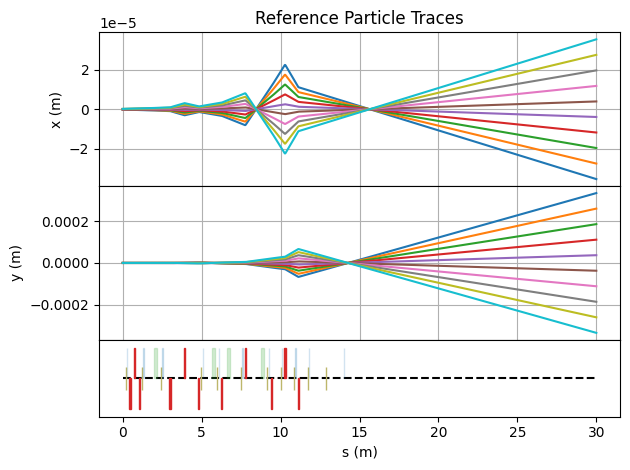

In [6]:
env.backend.segment.plot_overview()

In [7]:
env.reset()

(array([ 0.00065821,  0.0009085 ,  0.00171922,  0.00312473,  0.00761106,
        -0.00895396, -0.02000255, -0.01562817, -0.0101348 , -0.0071664 ],
       dtype=float32),
 {'backend_info': {'incoming_beam': array([1.4296584e+08, 5.4193608e-04, 8.3370724e-05, 3.3849044e-04,
          1.4801569e-05, 3.0944246e-04, 3.9433398e-05, 3.3322189e-04,
          3.0872896e-05, 7.3573729e-06, 2.0169116e-04], dtype=float32)}})

In [8]:
env.step(env.action_space.sample())

(array([ 0.00047207,  0.00018773, -0.00057424, -0.00129628, -0.00372664,
         0.00418303,  0.00965579,  0.00768705,  0.00553277,  0.00516636],
       dtype=float32),
 -0.4932357929646969,
 False,
 False,
 {'backend_info': {'incoming_beam': array([1.4296584e+08, 5.4193608e-04, 8.3370724e-05, 3.3849044e-04,
          1.4801569e-05, 3.0944246e-04, 3.9433398e-05, 3.3322189e-04,
          3.0872896e-05, 7.3573729e-06, 2.0169116e-04], dtype=float32)}})

In [9]:
wrapped_env = RescaleAction(env, -1, 1)

check_env(wrapped_env)

In [10]:
env.backend.segment.length

tensor(30.)

In [11]:
len(env.backend.segment.elements)

103

In [12]:
sum(isinstance(element, cheetah.Quadrupole) for element in env.backend.segment.elements)

11

In [13]:
[
    element.name
    for element in env.backend.segment.elements
    if isinstance(element, cheetah.Quadrupole)
]

['MQAWD_430031',
 'MQAWF_430034',
 'MQAWD_430037',
 'MQAWD_430109',
 'MQAWF_430118',
 'MQAWD_430128',
 'MQAWF_430205',
 'MQAWF_430311',
 'MQAWD_412344',
 'MQAWF_412346',
 'MQAWD_412347']

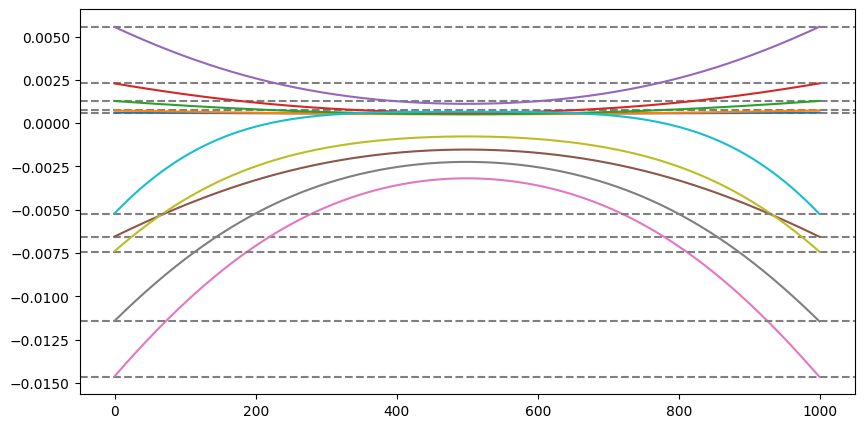

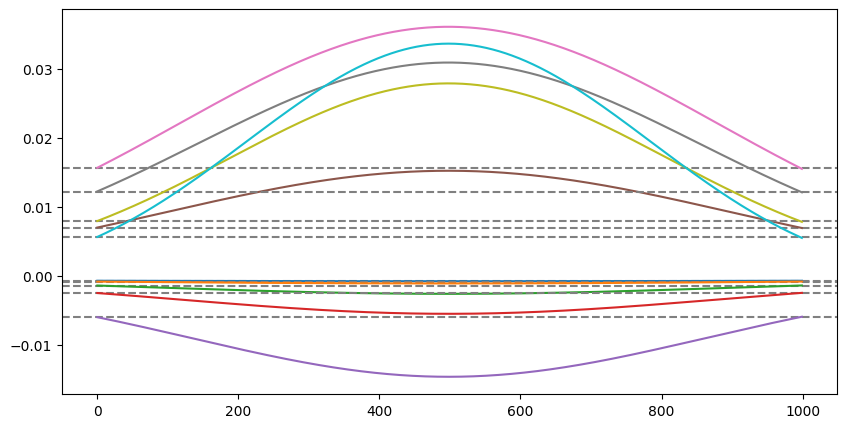

In [20]:
env = AwakeESteering(backend="cheetah", backend_args={"quad_drift_amplitude": 1.0})
observation_on_reset, _ = env.reset()
observations = np.array([env.step(np.zeros(10))[0] for _ in range(1_000)])

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.axhline(observation_on_reset[i], ls="--", color="grey")
    plt.plot(observations[:, i])
plt.show()

# Repeat with different reset

observation_on_reset, _ = env.reset()
observations = np.array([env.step(np.zeros(10))[0] for _ in range(1_000)])

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.axhline(observation_on_reset[i], ls="--", color="grey")
    plt.plot(observations[:, i])
plt.show()